# 0.0 Import Libriaries

In [5]:
import pandas as pd
import numpy as np

from sklearn import metrics as mt
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

# 0.1 Loading Datasets

In [2]:
X_train = pd.read_csv("X_training.csv")
y_train = pd.read_csv("y_training.csv")
X_val = pd.read_csv("X_val.csv")
y_val = pd.read_csv("y_val.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [3]:
X_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.092100,0.720,0.802,0.000000,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.737000,0.483,0.412,0.000000,0.636364,0.116,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.274000,0.671,0.565,0.000065,1.000000,0.370,0.013612,0,0.1600,1.009176,0.8,0.561
3,-0.580967,0.002340,0.704,0.529,0.874000,1.000000,0.370,-0.266382,0,0.0416,0.666173,0.8,0.507
4,-0.688566,0.000414,0.354,0.910,0.205000,0.090909,0.456,0.422914,1,0.0430,1.182630,0.8,0.362


In [4]:
# Data Preparation
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

# 1.0 Random Forest Regressor

## 1.1 Training

In [16]:
md_list = np.arange(2, 40, 1)
r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

for i in md_list:
    # define
    model = RandomForestRegressor(max_depth=i)
    # fit
    model.fit(X_train, y_train)
    # predict
    yhat_train = model.predict(X_train)
    # metrics
    r2 = np.round(mt.r2_score(y_train, yhat_train), 3)
    r2_list.append(r2)

    mse = np.round(mt.mean_squared_error(y_train, yhat_train), 3)
    mse_list.append(mse)

    rmse = np.round(np.sqrt(mse), 3)
    rmse_list.append(rmse)

    mae = np.round(mt.mean_absolute_error(y_train, yhat_train), 3)
    mae_list.append(mae)

    mape = np.round(mt.mean_absolute_percentage_error(y_train, yhat_train), 3)
    mape_list.append(mape)

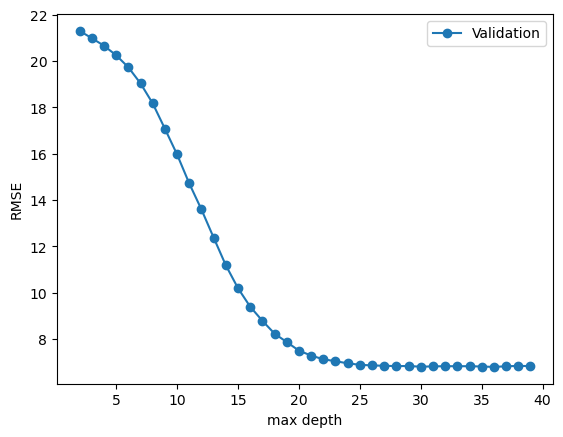

In [17]:
plt.plot(md_list, rmse_list, '-o', label='Validation')
plt.xlabel('max depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [18]:
df_results = {'Max Depth': md_list,
              'R2': r2_list,
              'MSE': mse_list,
              'RMSE': rmse_list,
              'MAE': mae_list,
              'MAPE': mape_list}
df_results = pd.DataFrame(df_results)

In [19]:
min(rmse_list)

6.795

In [20]:
# Best Max Depth Index
best_md = rmse_list.index(min(rmse_list))
best_md

34

In [21]:
# define
model = RandomForestRegressor(max_depth=best_md)
# fit
model.fit(X_train, y_train)
# predict
yhat_train = model.predict(X_train)
# metrics
r2 = np.round(mt.r2_score(y_train, yhat_train), 3)
print(f"R2: {r2}")
mse = np.round(mt.mean_squared_error(y_train, yhat_train), 3)
print(f"MSE: {mse}")
rmse = np.round(np.sqrt(mse), 3)
print(f"RMSE: {rmse}")
mae = np.round(mt.mean_absolute_error(y_train, yhat_train), 3)
print(f"MAE: {mae}")
mape = np.round(mt.mean_absolute_percentage_error(y_train, yhat_train), 3)
print(f"MAPE: {mape}%")

R2: 0.902
MSE: 46.628
RMSE: 6.828
MAE: 4.881
MAPE: 2.614%


## 1.2 Validation

In [22]:
# define
model = RandomForestRegressor(max_depth=best_md)
# fit
model.fit(X_train, y_train)
# predict
yhat_val = model.predict(X_val)
# metrics
r2 = np.round(mt.r2_score(y_val, yhat_val), 3)
print(f"R2: {r2}")
mse = np.round(mt.mean_squared_error(y_val, yhat_val), 3)
print(f"MSE: {mse}")
rmse = np.round(np.sqrt(mse), 3)
print(f"RMSE: {rmse}")
mae = np.round(mt.mean_absolute_error(y_val, yhat_val), 3)
print(f"MAE: {mae}")
mape = np.round(mt.mean_absolute_percentage_error(y_val, yhat_val), 3)
print(f"MAPE: {mape}%")

R2: 0.335
MSE: 317.609
RMSE: 17.822
MAE: 12.985
MAPE: 7.053%


## 1.3 Test

In [23]:
# define
model = RandomForestRegressor(max_depth=best_md)
# fit
model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
# predict
yhat_test = model.predict(X_test)
# metrics
r2 = np.round(mt.r2_score(y_test, yhat_test), 3)
print(f"R2: {r2}")
mse = np.round(mt.mean_squared_error(y_test, yhat_test), 3)
print(f"MSE: {mse}")
rmse = np.round(np.sqrt(mse), 3)
print(f"RMSE: {rmse}")
mae = np.round(mt.mean_absolute_error(y_test, yhat_test), 3)
print(f"MAE: {mae}")
mape = np.round(mt.mean_absolute_percentage_error(y_test, yhat_test), 3)
print(f"MAPE: {mape}%")

R2: 0.403
MSE: 290.808
RMSE: 17.053
MAE: 12.245
MAPE: 6.306%


c:\Users\alefa\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
